# TCS_ANN_MLP_Model

##  step1: Importing_Data

In [1]:
# data taking
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IIIT_Guwahati/ANN_MLP/TCS.NS_Data set for all trials.csv')

### s(i) delete_Last_Row

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/IIIT_Guwahati/ANN_MLP/TCS.NS_Data set for all trials.csv'  # Update this path if necessary
data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)

# Display the original dataset
print("Original dataset:")
print(data)

# Remove the last 10 rows
data = data[:-10]

# Display the updated dataset
print("\nUpdated dataset (last 10 rows removed):")
print(data)

# Save the updated dataset to a new CSV file if needed
# data.to_csv('/mnt/data/TCS_News_Dataset_Updated.csv', index=False)

# restore the variable from data to df
df = data

## step0: Prob_statement_Define

Q. Problem statement: Forcast High price (Dependent variable) considering all factor (Open, low, close, Adj close, volume) as independent variables

Sol: we try to

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/12/2023,3215.000000,3254.399902,3211.000000,3246.899902,3168.457764,2324605
1,6/13/2023,3260.000000,3265.000000,3239.000000,3243.699951,3165.335205,1371928
2,6/14/2023,3243.699951,3255.850098,3225.850098,3251.050049,3172.507813,1658544
3,6/15/2023,3245.300049,3247.449951,3210.000000,3216.300049,3161.939697,2273810
4,6/16/2023,3197.000000,3199.399902,3156.000000,3174.899902,3121.239014,4156189


In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/12/2023,3215.000000,3254.399902,3211.000000,3246.899902,3168.457764,2324605
1,6/13/2023,3260.000000,3265.000000,3239.000000,3243.699951,3165.335205,1371928
2,6/14/2023,3243.699951,3255.850098,3225.850098,3251.050049,3172.507813,1658544
3,6/15/2023,3245.300049,3247.449951,3210.000000,3216.300049,3161.939697,2273810
4,6/16/2023,3197.000000,3199.399902,3156.000000,3174.899902,3121.239014,4156189
...,...,...,...,...,...,...,...
239,6/4/2024,3700.000000,3745.000000,3591.500000,3715.000000,3715.000000,3395997
240,6/5/2024,3716.000000,3783.800049,3700.000000,3746.449951,3746.449951,2799670
241,6/6/2024,3781.000000,3839.899902,3741.500000,3830.399902,3830.399902,4328036
242,6/7/2024,3837.300049,3915.000000,3837.300049,3893.949951,3893.949951,4552445


In [4]:
# show statics

# df.describe()

## step2: Analysis_Data

In [5]:
# analysis parts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       244 non-null    object 
 1   Open       244 non-null    float64
 2   High       244 non-null    float64
 3   Low        244 non-null    float64
 4   Close      244 non-null    float64
 5   Adj Close  244 non-null    float64
 6   Volume     244 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


In [6]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop any rows where 'Date' conversion failed
df.dropna(subset=['Date'], inplace=True)

# Sort the data by date
df.sort_values(by='Date', inplace=True)

# Summary statistics
summary_stats = df.describe()

# Time range
time_range = df['Date'].min(), df['Date'].max()

summary_stats, time_range


(                                Date         Open         High          Low  \
 count                            244   244.000000   244.000000   244.000000   
 mean   2023-12-08 09:02:57.049180416  3664.665375  3696.703680  3634.917634   
 min              2023-06-12 00:00:00  3190.000000  3199.399902  3156.000000   
 25%              2023-09-06 18:00:00  3420.000000  3453.000000  3401.287537   
 50%              2023-12-07 12:00:00  3635.974976  3650.000000  3601.700074   
 75%              2024-03-06 06:00:00  3885.500000  3915.000000  3845.725037   
 max              2024-06-10 00:00:00  4215.250000  4254.750000  4177.000000   
 std                              NaN   271.327405   279.367469   265.114117   
 
              Close    Adj Close        Volume  
 count   244.000000   244.000000  2.440000e+02  
 mean   3666.348566  3627.506726  2.196084e+06  
 min    3174.899902  3121.239014  7.722910e+05  
 25%    3434.287476  3385.022095  1.427409e+06  
 50%    3627.799926  3580.383179 

In [7]:
#duration
time_range

(Timestamp('2023-06-12 00:00:00'), Timestamp('2024-06-10 00:00:00'))

### s(i) Statistical_Analy

In [8]:
# Summary statistics
summary_stats = df.describe()

summary_stats

,Date,Open,High,Low,Close,Adj Close,Volume
count,244,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,2023-12-08 09:02:57.049180416,3664.665375,3696.703680,3634.917634,3666.348566,3627.506726,2.196084e+06
min,2023-06-12 00:00:00,3190.000000,3199.399902,3156.000000,3174.899902,3121.239014,7.722910e+05
25%,2023-09-06 18:00:00,3420.000000,3453.000000,3401.287537,3434.287476,3385.022095,1.427409e+06
50%,2023-12-07 12:00:00,3635.974976,3650.000000,3601.700074,3627.799926,3580.383179,1.834935e+06
75%,2024-03-06 06:00:00,3885.500000,3915.000000,3845.725037,3878.224976,3849.505249,2.599507e+06
max,2024-06-10 00:00:00,4215.250000,4254.750000,4177.000000,4219.250000,4188.805176,1.095680e+07
std,NaN,271.327405,279.367469,265.114117,271.844601,281.718309,1.277040e+06


In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-12,3215.000000,3254.399902,3211.000000,3246.899902,3168.457764,2324605
1,2023-06-13,3260.000000,3265.000000,3239.000000,3243.699951,3165.335205,1371928
2,2023-06-14,3243.699951,3255.850098,3225.850098,3251.050049,3172.507813,1658544
3,2023-06-15,3245.300049,3247.449951,3210.000000,3216.300049,3161.939697,2273810
4,2023-06-16,3197.000000,3199.399902,3156.000000,3174.899902,3121.239014,4156189


### s(ii) Graphically_PriceOverTime

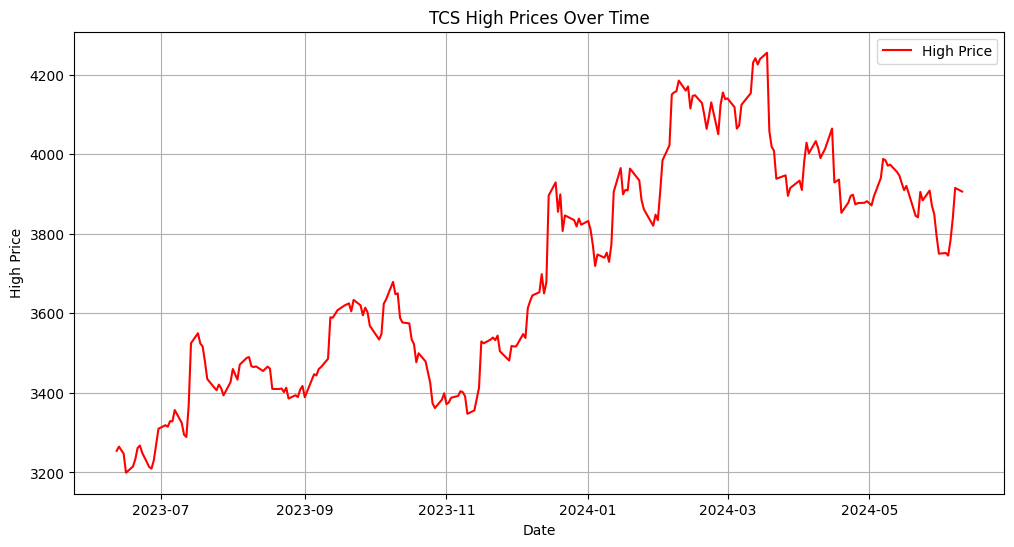

In [10]:
import matplotlib.pyplot as plt

# Plot the High prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='High Price', color='red')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('TCS High Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()


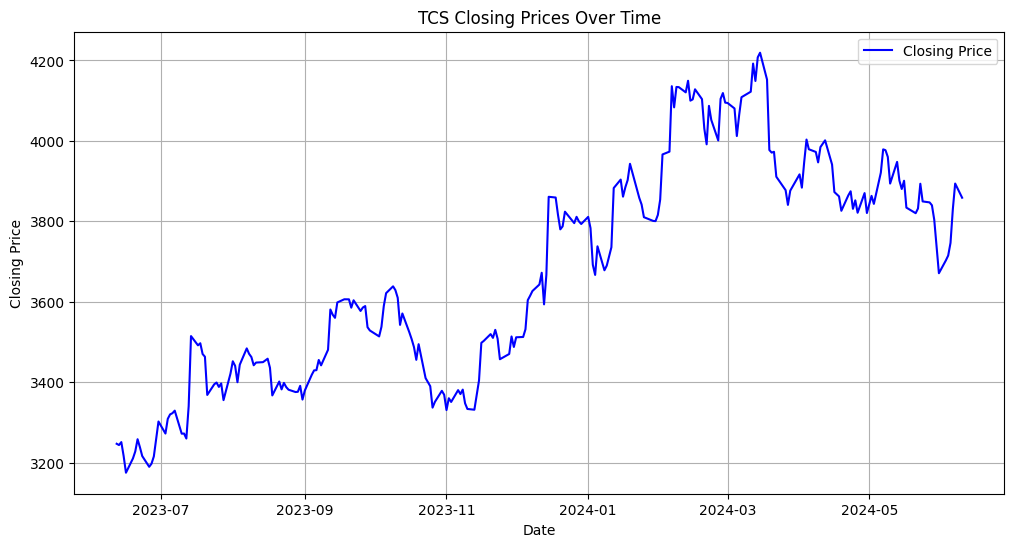

In [11]:
import matplotlib.pyplot as plt

# Plot the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('TCS Closing Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()


you can also plot on same graph

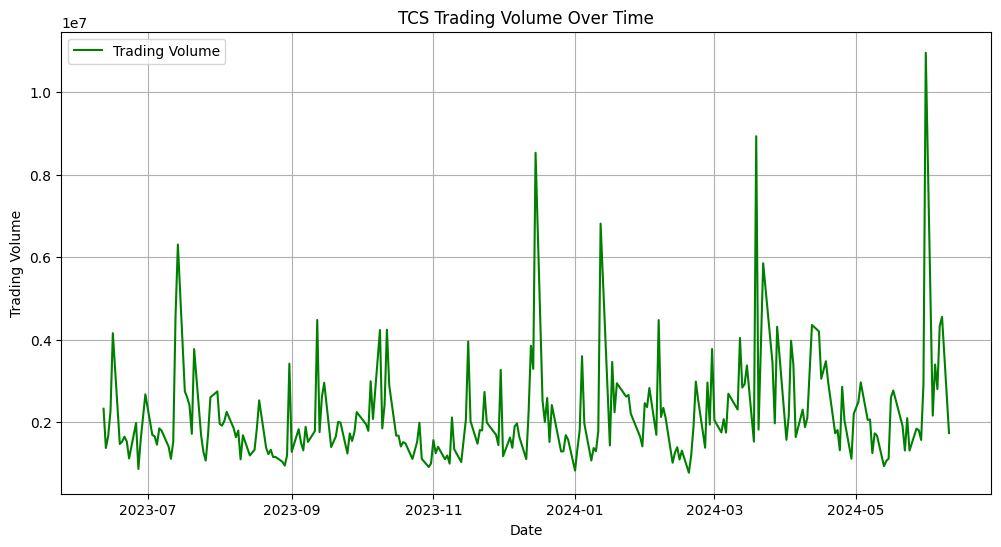

In [12]:
# Plot the trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Trading Volume', color='green')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('TCS Trading Volume Over Time')
plt.legend()
plt.grid(True)
plt.show()


## step3: PrePreocessing_Data

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-12,3215.000000,3254.399902,3211.000000,3246.899902,3168.457764,2324605
1,2023-06-13,3260.000000,3265.000000,3239.000000,3243.699951,3165.335205,1371928
2,2023-06-14,3243.699951,3255.850098,3225.850098,3251.050049,3172.507813,1658544
3,2023-06-15,3245.300049,3247.449951,3210.000000,3216.300049,3161.939697,2273810
4,2023-06-16,3197.000000,3199.399902,3156.000000,3174.899902,3121.239014,4156189


In [14]:
# Sort by date
df.sort_values('Date', inplace=True)

In [15]:
# Select the 'High' column
high_prices = df['High'].values

## step4: Splitting_dataPoint

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
# Scale the data
scaler = MinMaxScaler()
high_prices_scaled = scaler.fit_transform(high_prices.reshape(-1, 1))

### s(i) prep_dataset_for_MLP

In NumPy, the flatten() function is used to return a copy of the array collapsed into one dimension. It creates a new 1-dimensional array by iterating through all elements of the original array, essentially flattening it.

In [18]:
# import numpy as np

# # Creating a 2D NumPy array
# arr = np.array([[1, 2, 3],
#                 [4, 5, 6]])

# # Flattening the array
# flatten_arr = arr.flatten()

# print(flatten_arr)
# # Output: [1 2 3 4 5 6]

In [19]:
# Prepare the dataset for MLP
# Use the past 10 days' high prices to predict the next day's high price
X = []
y = []
look_back = 10

for i in range(len(high_prices_scaled) - look_back):
    X.append(high_prices_scaled[i:i + look_back])
    y.append(high_prices_scaled[i + look_back])

X = np.array(X)
y = np.array(y).flatten()

### s(ii) TrainTest_split

In [20]:
# Split the data into training and test sets

train_size = int(len(X) * 0.8)      # 80% taining, 20% testing


X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [21]:
# Reshape X to be 2D for MLPRegressor
X = X.reshape(X.shape[0], -1)  # Reshape to (samples, time_steps * features)

In [22]:
# Define and train the MLP model

# mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

# # no of hidden layer = 100

# mlp.fit(X_train, y_train)

In [23]:
# Prepare the dataset for MLP
# Use the past 10 days' high prices to predict the next day's high price
X = []
y = []
look_back = 10

for i in range(len(high_prices_scaled) - look_back):
    X.append(high_prices_scaled[i:i + look_back])
    y.append(high_prices_scaled[i + look_back])

X = np.array(X)
y = np.array(y).flatten()

# Reshape X to be 2D for MLPRegressor
X = X.reshape(X.shape[0], -1)  # Reshape to (samples, time_steps * features)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)      # 80% taining, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define and train the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

MLPRegressor(random_state=42)

## Step5: Predication

In [24]:
# Make predictions
train_predictions = mlp.predict(X_train)
test_predictions = mlp.predict(X_test)


In [25]:
# Inverse transform the predictions and actual values

train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

### s(i) plot_predication

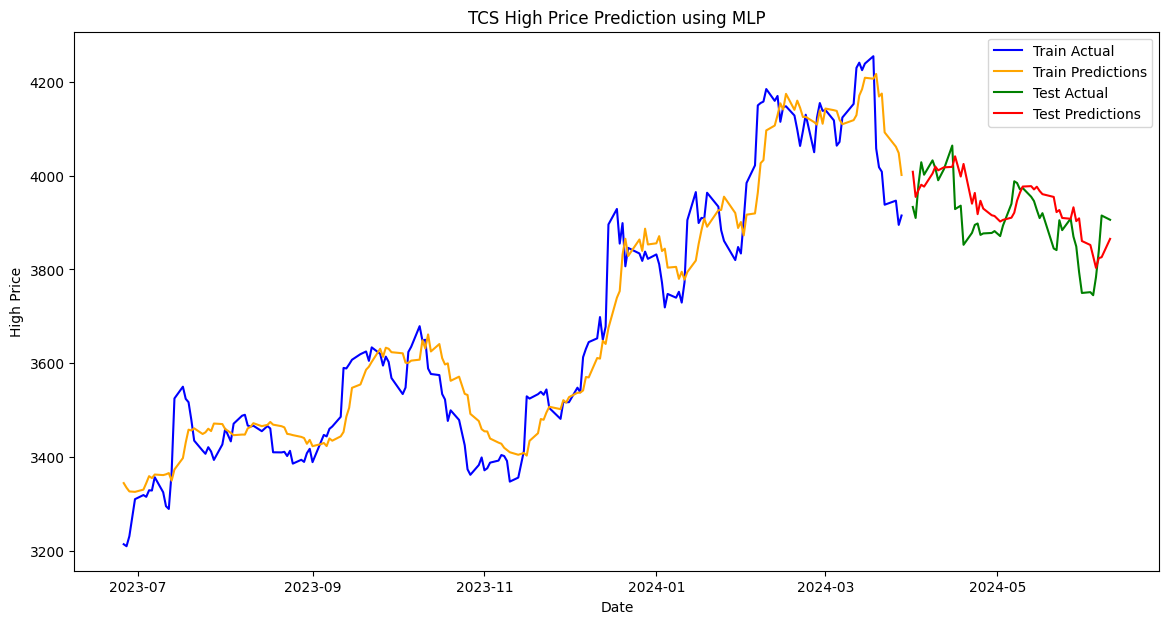

In [26]:
# Plot the actual vs. predicted high prices


plt.figure(figsize=(14, 7))

plt.plot(df['Date'][look_back:train_size + look_back], y_train_actual, label='Train Actual', color='blue')
plt.plot(df['Date'][look_back:train_size + look_back], train_predictions, label='Train Predictions', color='orange')
plt.plot(df['Date'][train_size + look_back:], y_test_actual, label='Test Actual', color='green')
plt.plot(df['Date'][train_size + look_back:], test_predictions, label='Test Predictions', color='red')


plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('TCS High Price Prediction using MLP')
plt.legend()
plt.show()



In [27]:
# Forecast the next 10 days
last_10_days = high_prices_scaled[-look_back:]
forecast = []

for _ in range(10):
    next_day = mlp.predict(last_10_days.reshape(1, -1))
    forecast.append(next_day)
    last_10_days = np.append(last_10_days[1:], next_day)


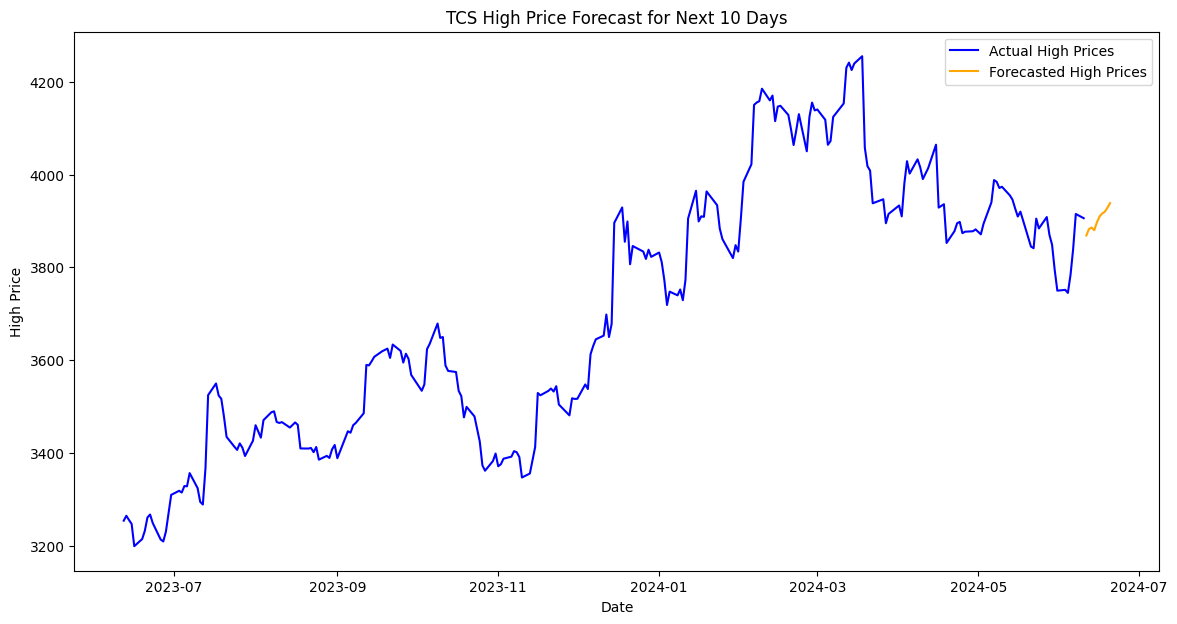

In [28]:
# Inverse transform the forecast
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], high_prices, label='Actual High Prices', color='blue')
future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=10)
plt.plot(future_dates, forecast, label='Forecasted High Prices', color='orange')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('TCS High Price Forecast for Next 10 Days')
plt.legend()
plt.show()



### s(ii) Predicated_Numerical_Val

In [29]:
# Print the forecasted values
for date, value in zip(future_dates, forecast):
    print(f"{date.date()}: {value[0]:.2f}")

2024-06-11: 3868.66
2024-06-12: 3882.58
2024-06-13: 3885.72
2024-06-14: 3880.09
2024-06-15: 3896.78
2024-06-16: 3909.48
2024-06-17: 3915.94
2024-06-18: 3919.91
2024-06-19: 3928.48
2024-06-20: 3938.30


### s(iii) Matrics: MAE

In [32]:
# import metric imp library for MAE, MSE, RMSE, R Sq

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [33]:
# Calculate evaluation metrics

mae_train = mean_absolute_error(y_train_actual, train_predictions)
mse_train = mean_squared_error(y_train_actual, train_predictions)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_actual, train_predictions)

mae_test = mean_absolute_error(y_test_actual, test_predictions)
mse_test = mean_squared_error(y_test_actual, test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_actual, test_predictions)

### s(iv) MSE_RMSE_RSq

In [34]:
# Print the evaluation metrics

print("Training Metrics:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.2f}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.2f}")

Training Metrics:
MAE: 55.65
MSE: 5037.88
RMSE: 70.98
R²: 0.93

Testing Metrics:
MAE: 49.22
MSE: 3735.14
RMSE: 61.12
R²: 0.32
